In [1]:
import pickle as pkl
import pandas as pd
import time as tm
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.cm as cm

from pytesdaq.processing import IVanalysis
from pytesdaq.processing import _iv_didv_tools_plotting as plot

import qetpy as qp

from pytesdaq.io.hdf5 import H5Reader

nice_fonts = {
        "font.family": "sans-serif",
        "axes.labelsize": 14,
        "font.size": 12,
        "legend.fontsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
}

rcParams.update(nice_fonts)
rcParams['grid.linestyle'] = '--'
rcParams['xtick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['ytick.right'] = True

In [2]:
df = pd.read_pickle(
    '/data/users/da_real_maggie_reed/processed/run_27/iv_didv/iv_didv_I2_D20230427_T120711/iv_didv_I2_D20230427_T120711_processed.pkl',
)

# Setup

In [35]:
chans = ['TES800x200SiO2-2'] #Channel D 
figsavepath = '/home/da_real_maggie_reed/analysis/run_27/ivdidv/figs/iv_didv_I2_D20230427_T120711/'

rsh = 5e-3

In [7]:
#df.didvmean *= -1
#df.avgtrace *= -1
#df.psd *= -1
'''
pass_arr = np.ones(len(df), dtype = bool)
pass_arr[50] = False
pass_arr[22] = False
pass_arr[9] = False
pass_arr[12] = False
pass_arr[14] = False
pass_arr[35] = False
pass_arr[37] = False
pass_arr[39] = False
df['cut_pass'] = pass_arr

print(df)
''';

         channels                             seriesnum         fs  \
0   Melange1pc1ch  didv_I2_D20230215_T153955_F0001.hdf5  1250000.0   
1   Melange1pc1ch  didv_I2_D20230215_T154243_F0001.hdf5  1250000.0   
2   Melange1pc1ch  didv_I2_D20230215_T154531_F0001.hdf5  1250000.0   
3   Melange1pc1ch  didv_I2_D20230215_T154818_F0001.hdf5  1250000.0   
4   Melange1pc1ch  didv_I2_D20230215_T155106_F0001.hdf5  1250000.0   
5   Melange1pc1ch  didv_I2_D20230215_T155355_F0001.hdf5  1250000.0   
6   Melange1pc1ch  didv_I2_D20230215_T155644_F0001.hdf5  1250000.0   
7   Melange1pc1ch  didv_I2_D20230215_T155934_F0001.hdf5  1250000.0   
8   Melange1pc1ch  didv_I2_D20230215_T160224_F0001.hdf5  1250000.0   
9   Melange1pc1ch  didv_I2_D20230215_T160514_F0001.hdf5  1250000.0   
10  Melange1pc1ch  didv_I2_D20230215_T160803_F0001.hdf5  1250000.0   
11  Melange1pc1ch  didv_I2_D20230215_T161051_F0001.hdf5  1250000.0   
12  Melange1pc1ch  didv_I2_D20230215_T161339_F0001.hdf5  1250000.0   
13  Melange1pc1ch  d

In [36]:
tc = 76e-3 #42.1 mK @ 40% RN 217 mOh
#passing parameters to IVanalysis, see the process notebook for docstrings
#nnorm and nsc: known from what the set up was from the IV/dIdV sequencer

out = IVanalysis(
    df,
    nnorm = 12,
    nsc = 6,
    #tbath=5e-3,
    tc=tc,
    channelname=chans,
    figsavepath = figsavepath
)
# out.traninds = range(6, 15)

#how to find out what tbath is? 7mk?
#out.traninds = range(30, 39)
#done auto, anything not in nnorm or nsc
#speed ups -> later for LSF'ing 
#not sure what traninds is probably individual transition range points? 


In [33]:
df.qetbias *= -1 

In [21]:
#1.38 e-12 is the bias power of the device (femptowatts) 
#out.gta is an estimate for thermal conductance bt. TES and absorber
out.Gta = 5 * 1.38e-12 / tc
out.Gta

9.078947368421053e-11

# bias power and current response 

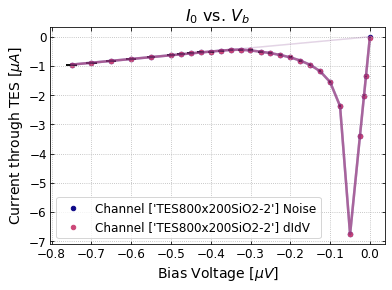

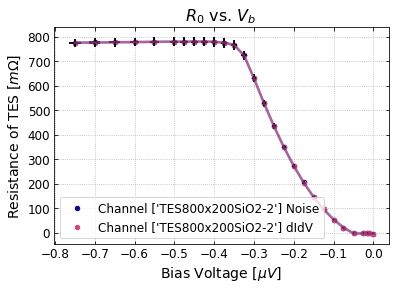

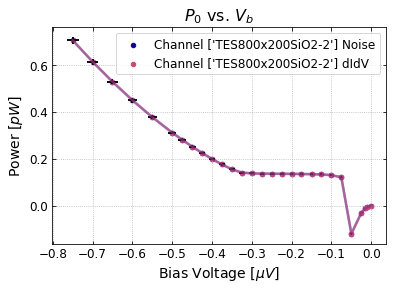

In [37]:
out.rshunt_err = 0.1e-3

out.analyze_sweep(lgcplot=True, lgcsave=False, fitsc=False)

# didv fitting 

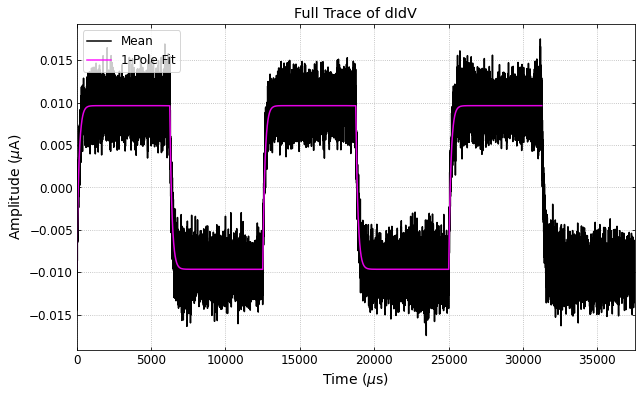

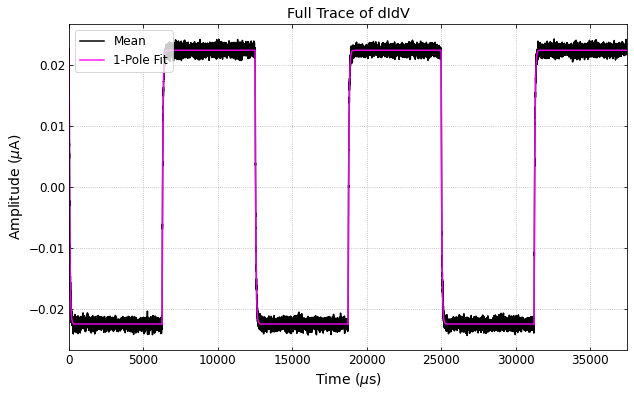

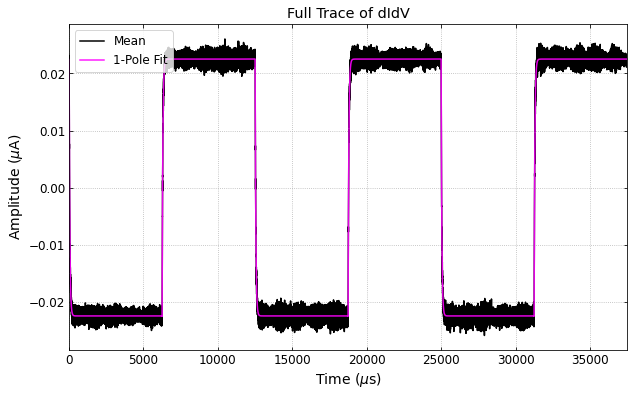

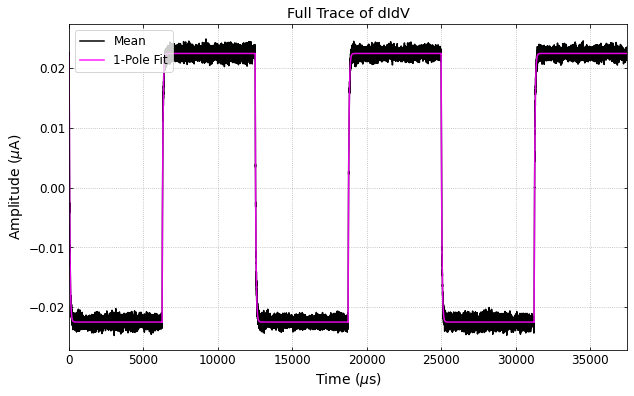

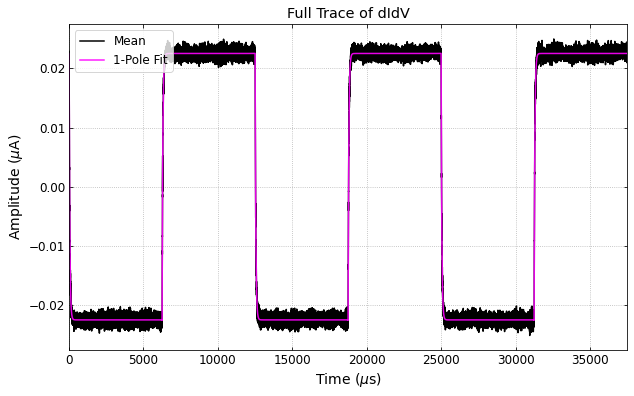

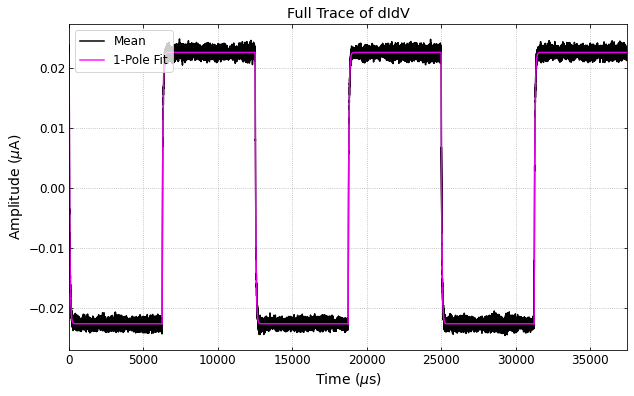

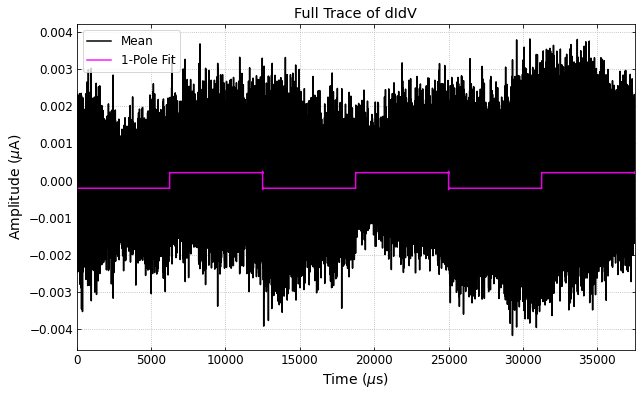

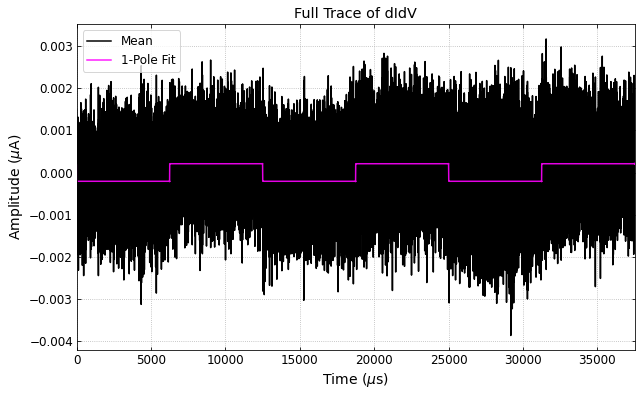

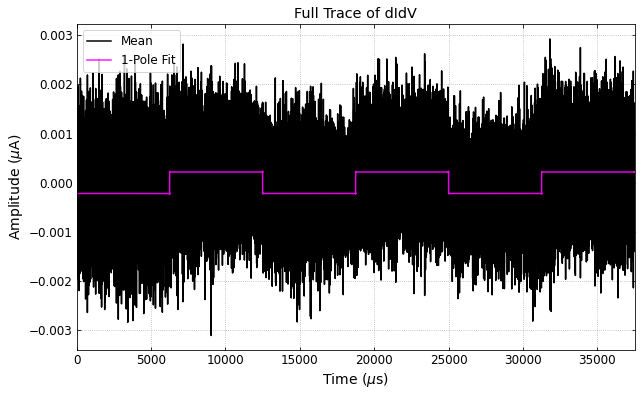

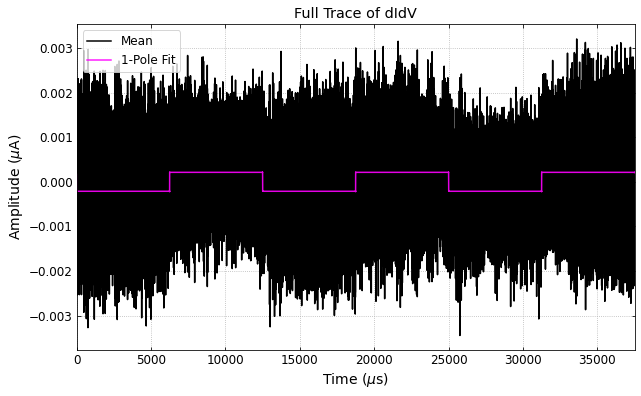

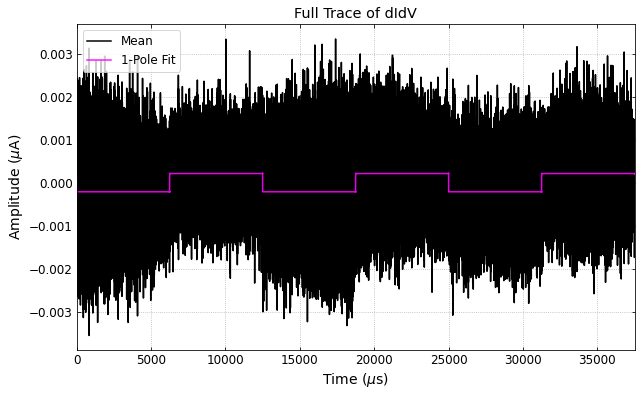

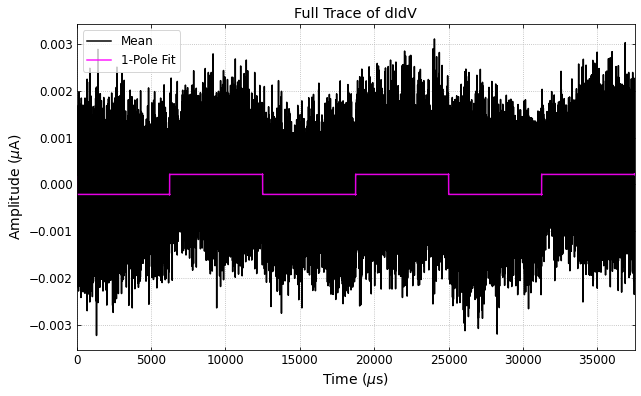

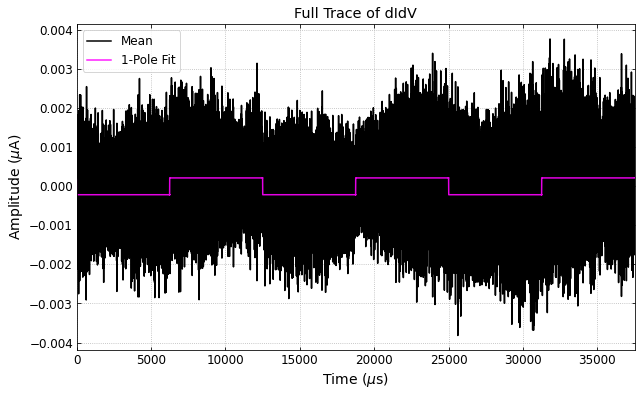

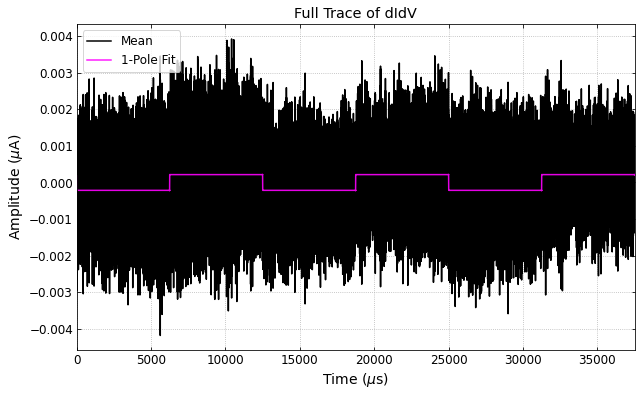

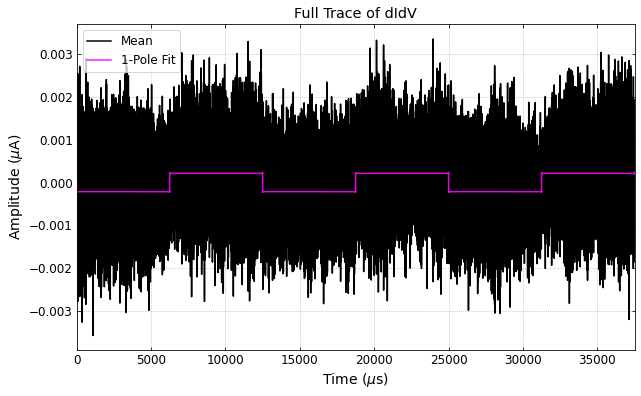

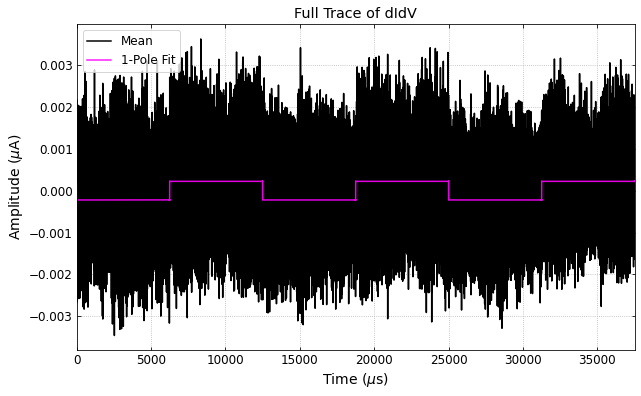

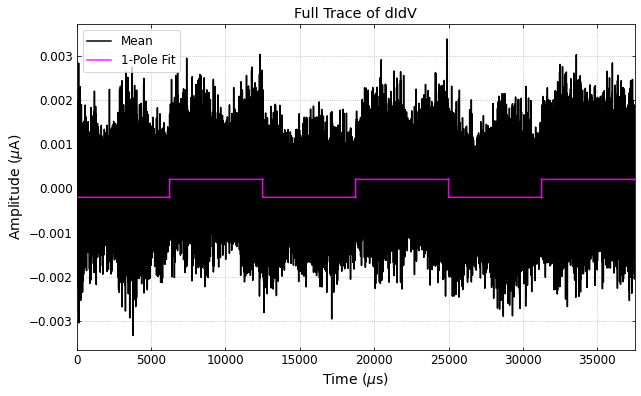

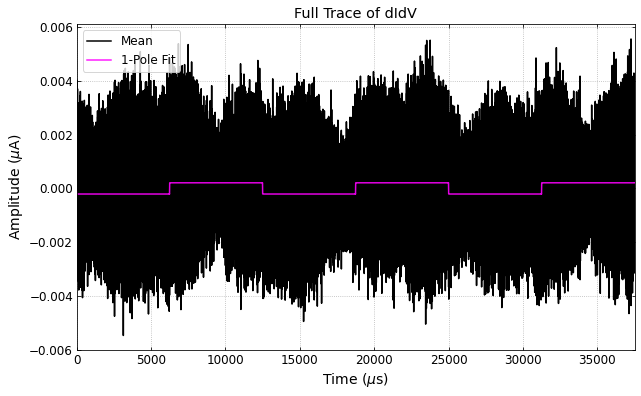

In [38]:
#dIdV fitting 
out.fit_rload_rn(lgcplot = True)
#IVobj.fit_tran_didv(lgcplot = True)

# noise modeling
#IVobj.fit_normal_noise()
#IVobj.fit_sc_noise()
#IVobj.model_noise_simple()
# estimate expected baseline energy resolution
#IVobj.estimate_noise_errors()
#IVobj.find_optimum_bias()

# Roger's stuff from run 26 iv analysis for edit when I finish this or start this iv analysis 

In [48]:
IVobj_D_1217.tc = 48.8e-3
IVobj_D_1217.tbath = 16e-3
IVobj_D_1217.tload = 65e-3

IVobj_D_1217.Gta = 5 * IVobj_D_1217.df[IVobj_D_1217.didvinds].iloc[9]['ptes']/IVobj_D_1217.tc
#print(IVobj_A.norminds)
#print(IVobj.noiseinds)

/home/roger/.local/lib/python3.6/site-packages/qetpy/plotting/_noise_plotting.py:603: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(11, 6))


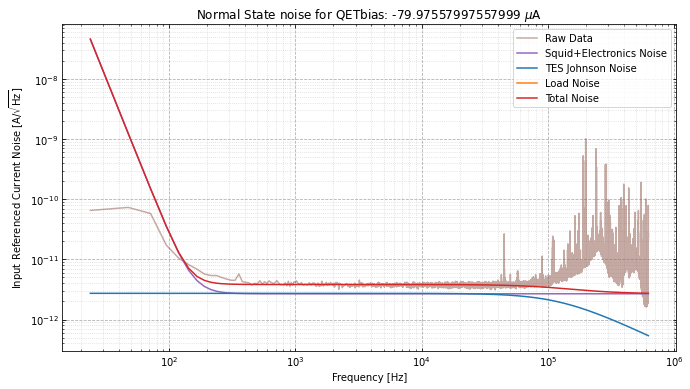

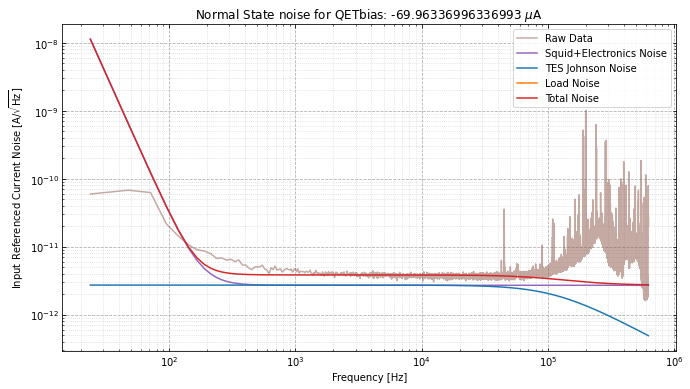

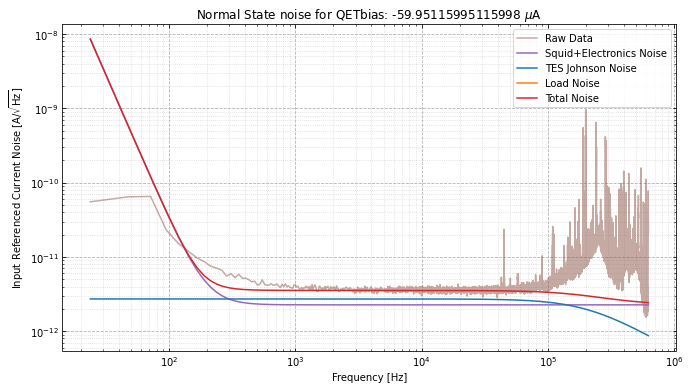

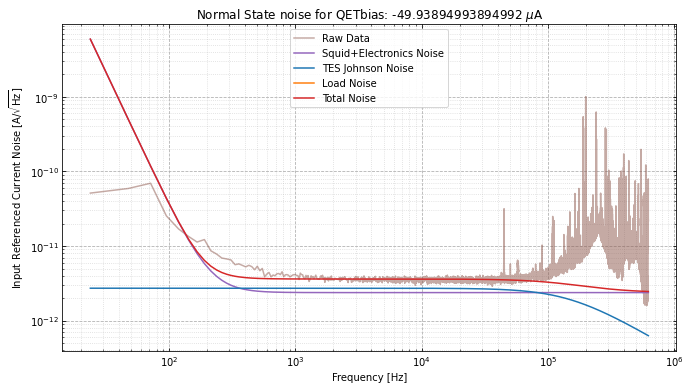

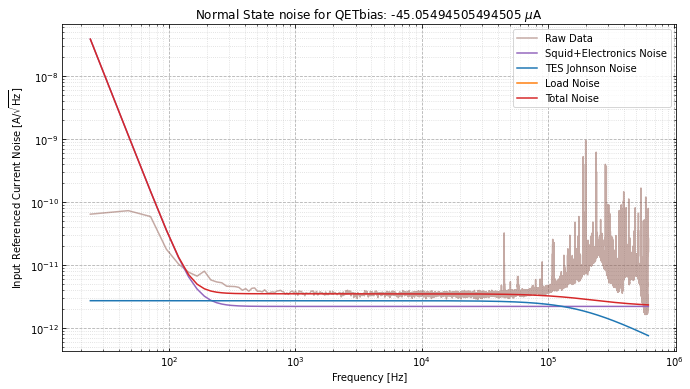

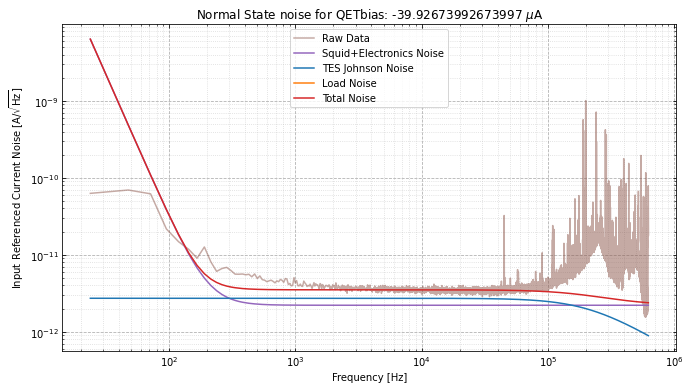

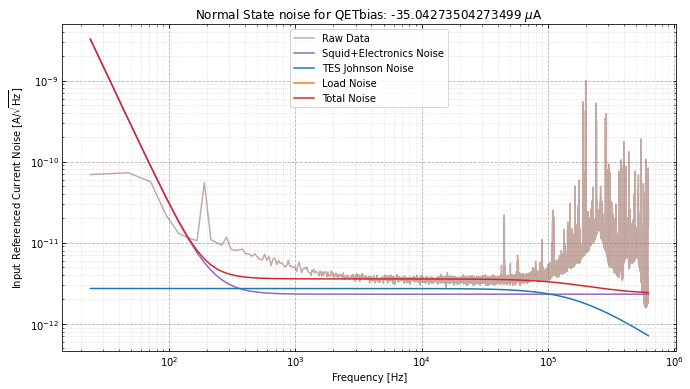

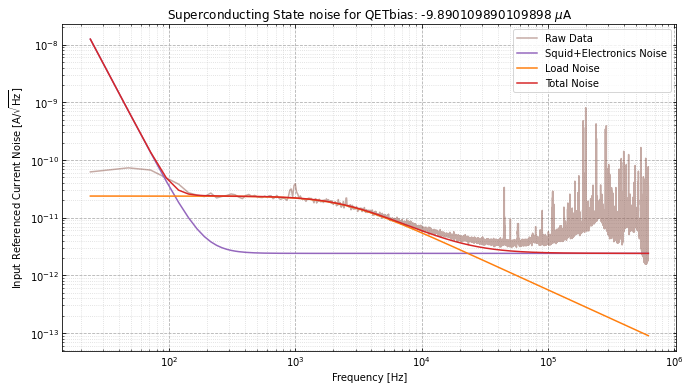

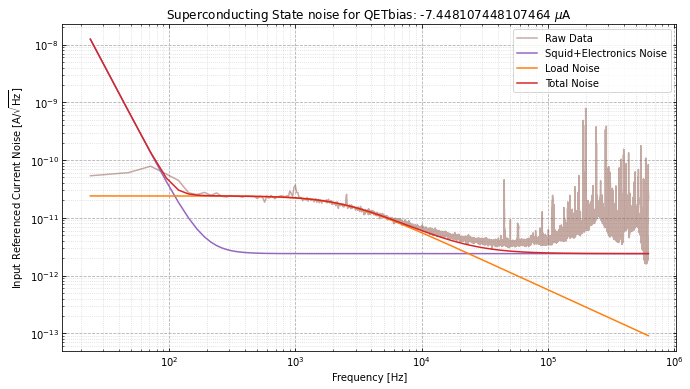

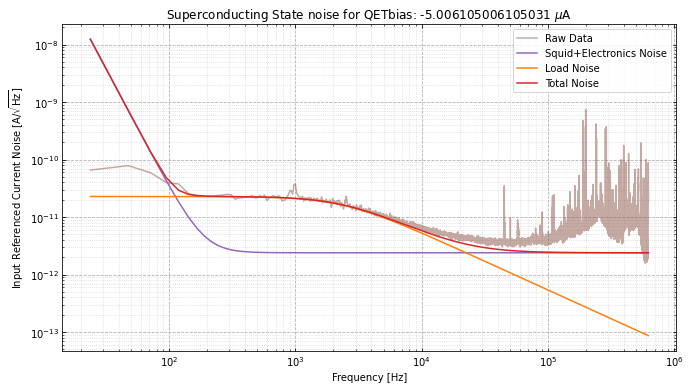

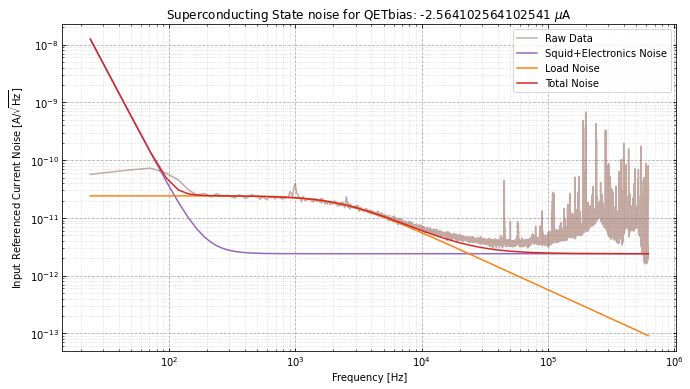

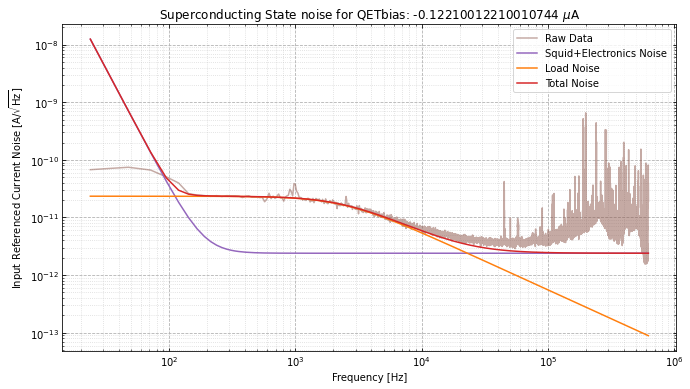

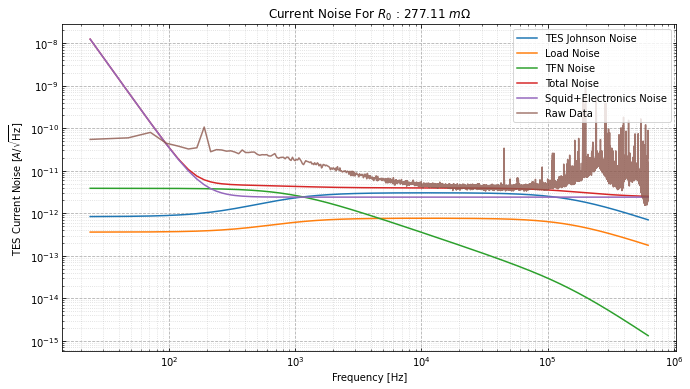

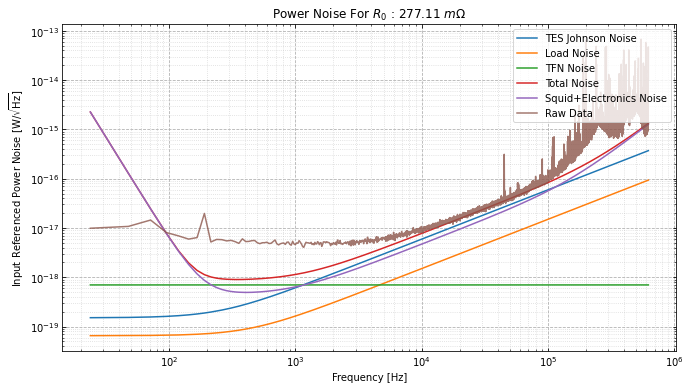

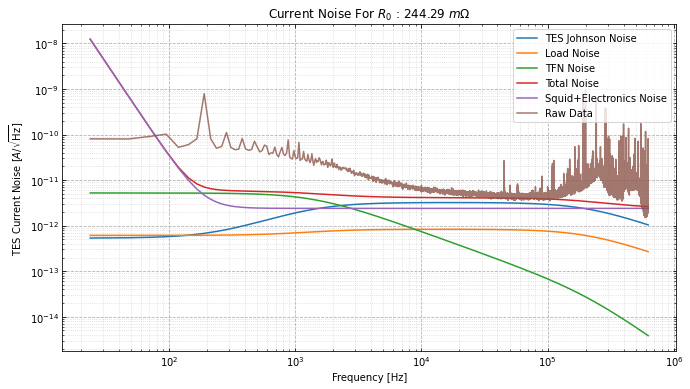

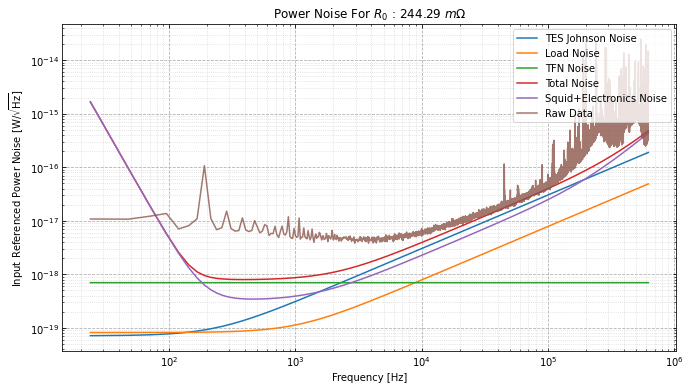

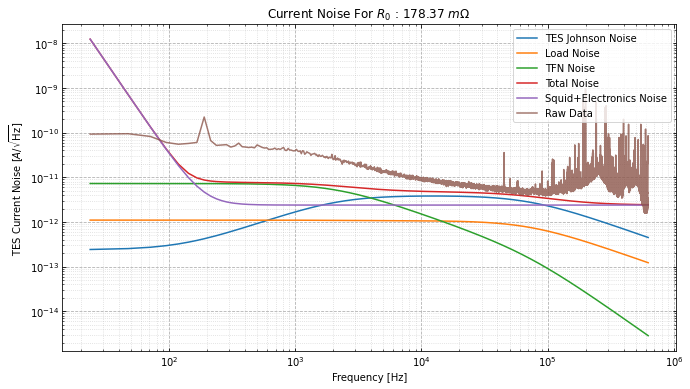

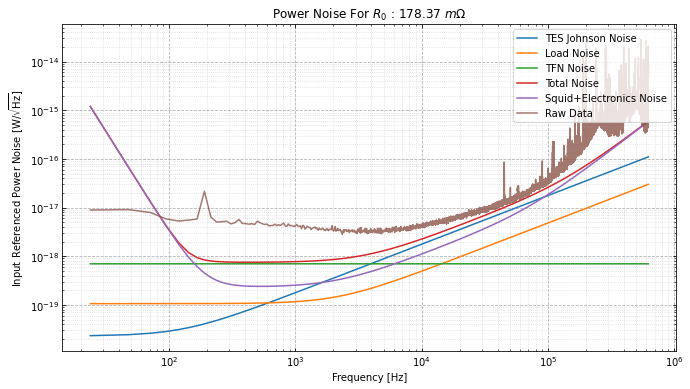

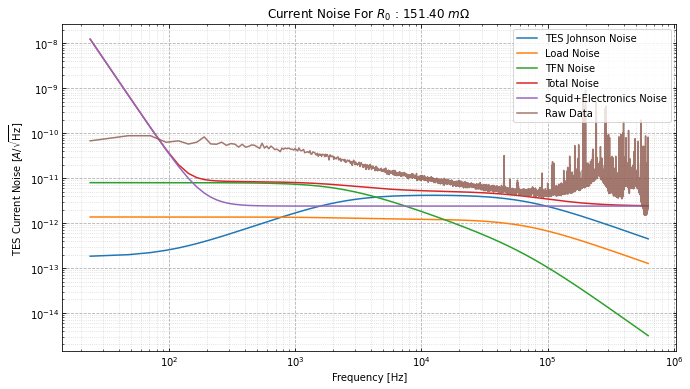

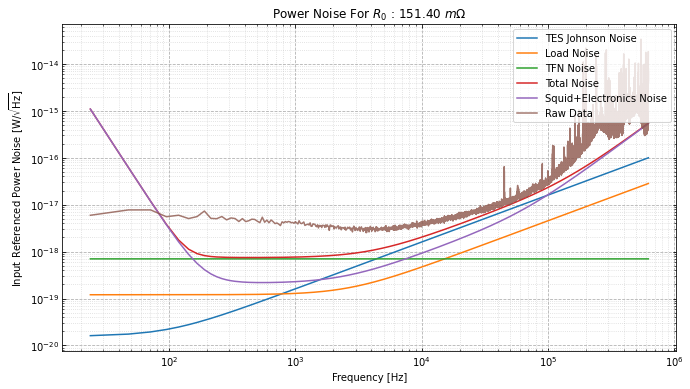

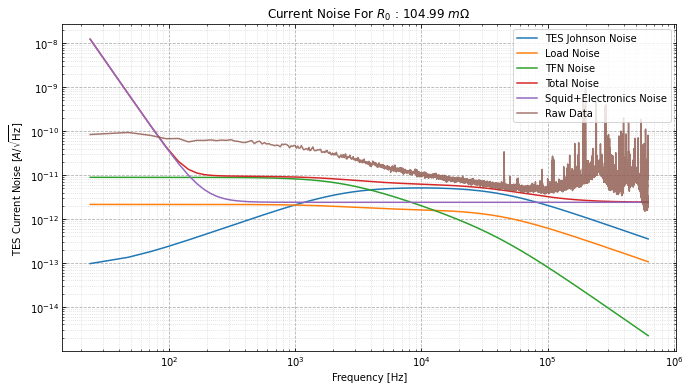

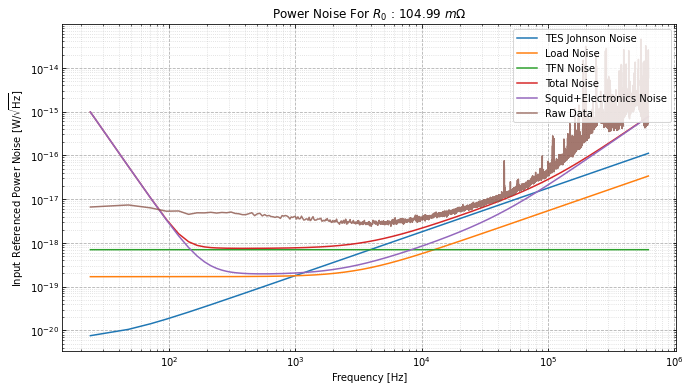

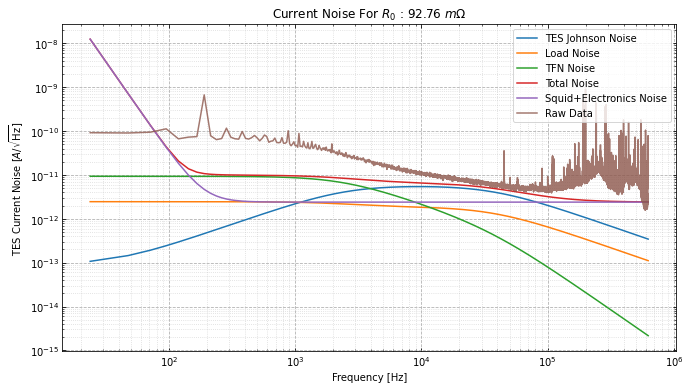

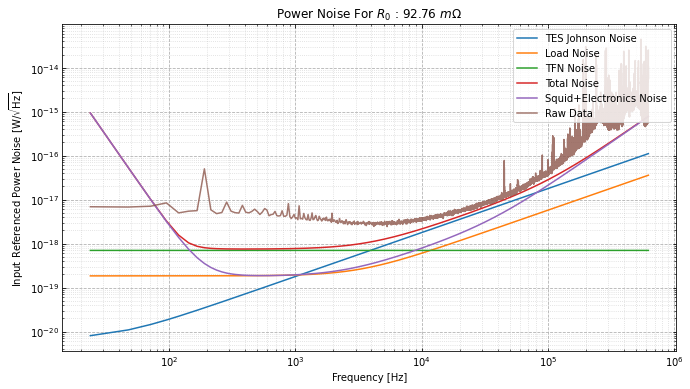

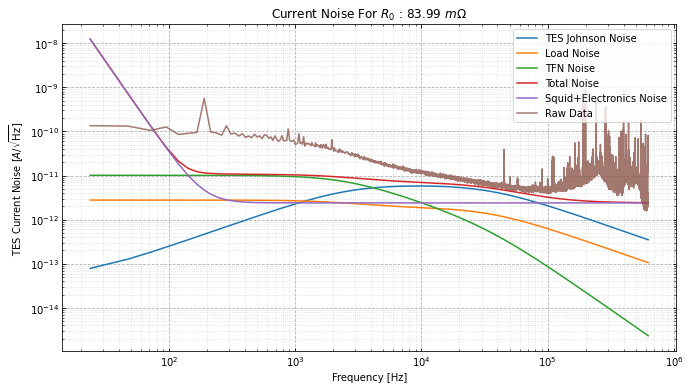

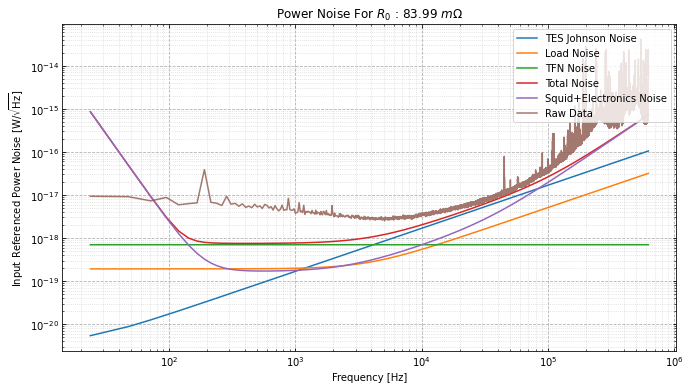

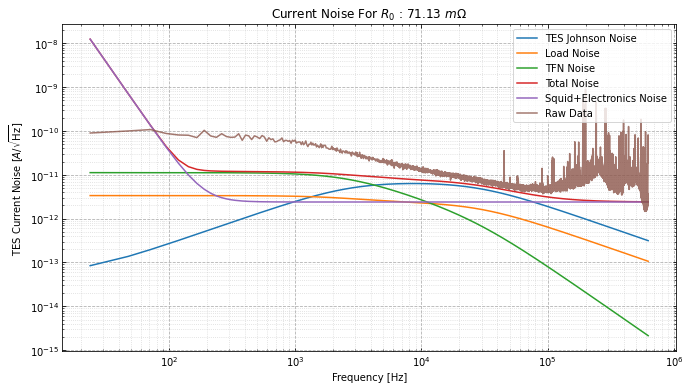

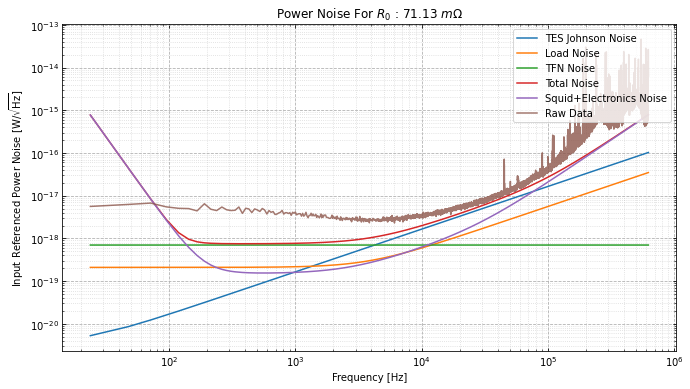

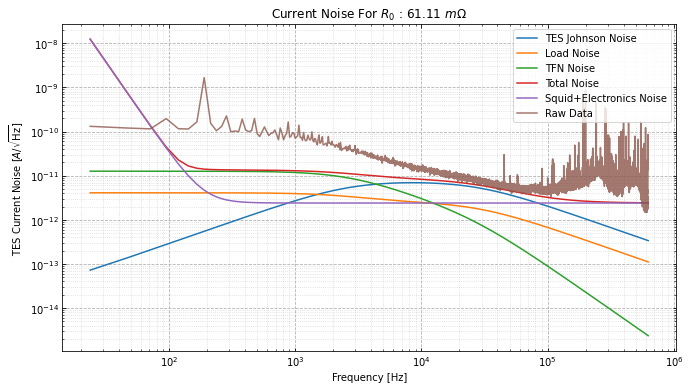

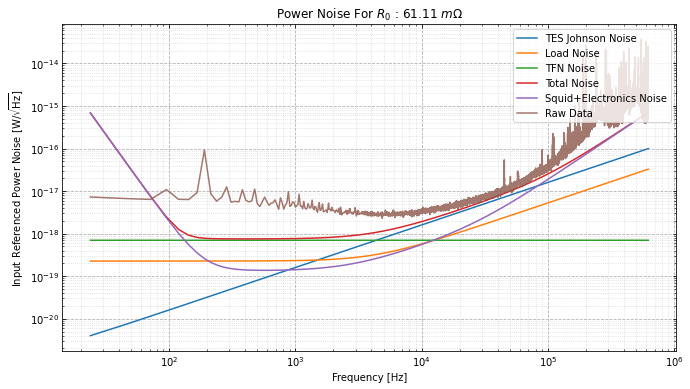

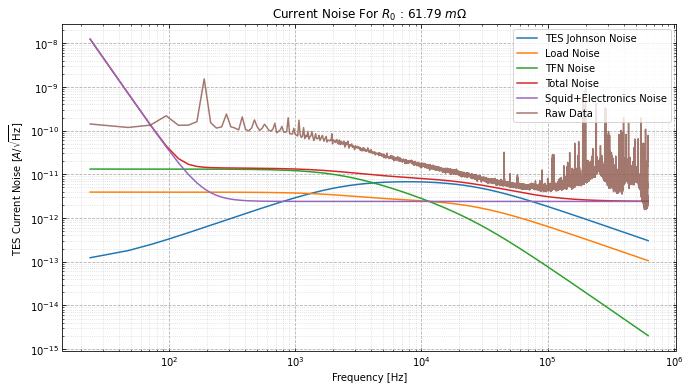

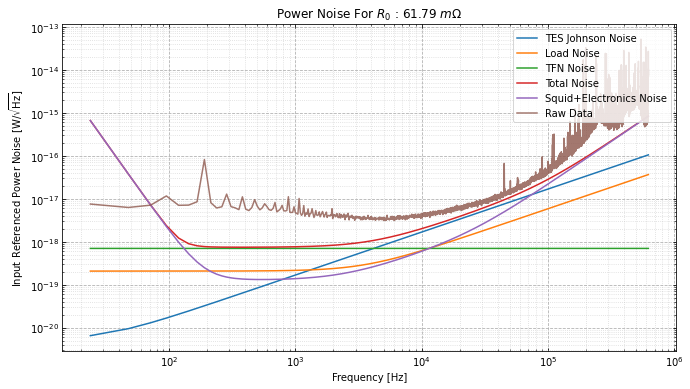

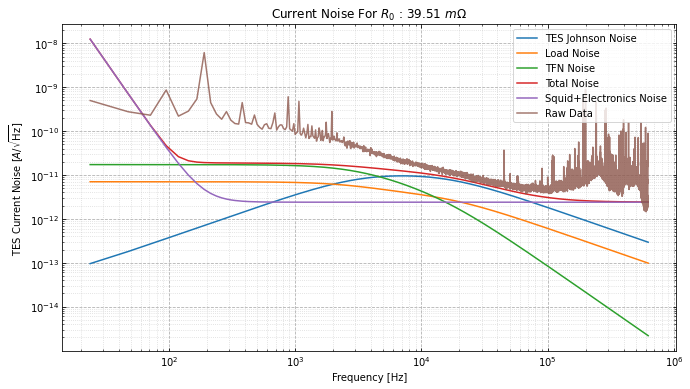

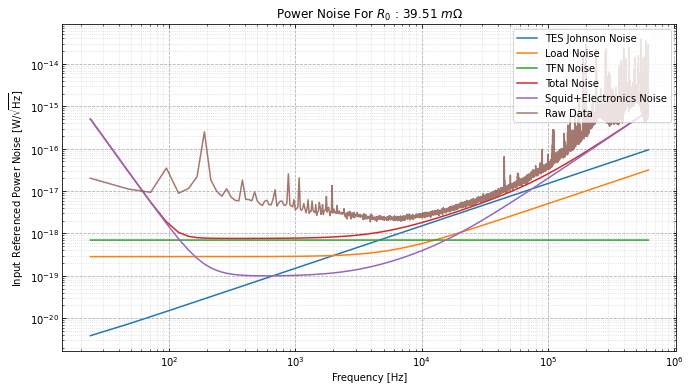

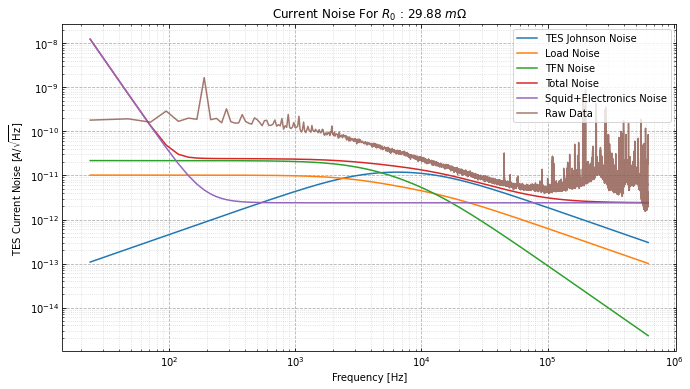

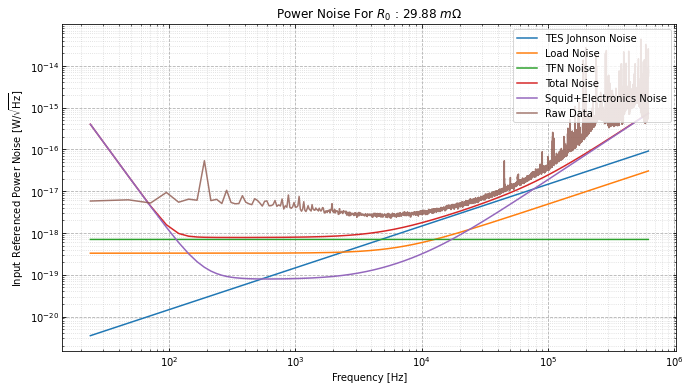

In [49]:
#IVobj.rshunt_err = 0.1e-3
#IVobj.analyze_sweep(lgcplot = True)
# dIdV fitting
#IVobj.fit_rload_rn(lgcplot = True)
#IVobj.fit_tran_didv(lgcplot = True)
# noise modeling
IVobj_D_1217.fit_normal_noise(fit_range = [1e2, 1e5], lgcplot = True, lgcsave = False)
IVobj_D_1217.fit_sc_noise(fit_range = [1e2, 1e5], lgcplot = True, lgcsave = False)
IVobj_D_1217.model_noise_simple(lgcplot = True, lgcsave = False, tau_collect = 250e-6)
# estimate expected baseline energy resolution
#IVobj.estimate_noise_errors()
#IVobj.find_optimum_bias()

In [50]:
#IVobj.rshunt_err = 0.1e-3
#IVobj.analyze_sweep(lgcplot = True)
# dIdV fitting
#IVobj.fit_rload_rn(lgcplot = True)
#IVobj.fit_tran_didv(lgcplot = True)
# noise modeling
#IVobj.fit_normal_noise(fit_range = [1e2, 1e5], lgcplot = True)
#IVobj.fit_sc_noise(fit_range = [1e2, 1e5], lgcplot = True)
#IVobj.model_noise_simple(lgcplot = True)
# estimate expected baseline energy resolution
IVobj_D_1217.estimate_noise_errors()

(-1.208791208791206e-05, 0.09104959010964775, 0.060590252858021595)

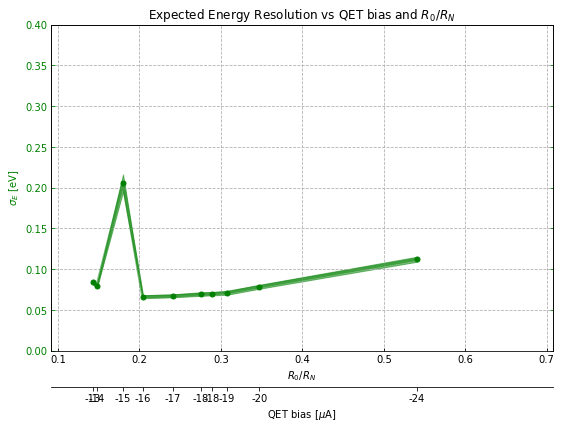

In [51]:
IVobj_D_1217.find_optimum_bias(lgcplot = True, ylims = [0, 0.4])

In [17]:
print(IVobj_A.rload)
print(IVobj_A.rload * 32e-6)

NameError: name 'IVobj_A' is not defined

In [ ]:
print(IVobj_C_1217.df[IVobj_C_1217.didvinds])
print(IVobj_C_1217.fitresult(3))

In [29]:
print("Bias (uA), R0 (mOhms), I0 (nA), PTES (fW)")

for index, row in IVobj_D_1217.df[IVobj_D_1217.didvinds].iloc[0:-1].iterrows():
    print(
        f"{row['qetbias'] * 1e6:.1f}     ",
        f"{row['r0'] * 1e3:.1f}       ",
        f"{row['i0'] * 1e9:.1f}    ",
        f"{row['ptes'] * 1e15:.1f}    ",
        f"{row['didvobj'].fitresult(2).get('params', {'tau1':0}).get('tau1')*1e6:.1f}",
        f"{row['didvobj'].fitresult(2).get('params', {'tau2':0}).get('tau2')*1e6:.1f}",
        f"{row['didvobj'].fitresult(3).get('params', {'tau1':0}).get('tau1')*1e6:.1f}",
        f"{row['didvobj'].fitresult(3).get('params', {'tau2':0}).get('tau2')*1e6:.1f}",
        f"{row['didvobj'].fitresult(3).get('params', {'tau3':0}).get('tau3')*1e6:.1f}",
        #f"{row['didvobj'].fitresult(3)['falltimes'][0] * 1e6:.1f}",
        #f"{row['didvobj'].fitresult(3)['falltimes'][1] * 1e6:.1f}",
        #f"{row['didvobj'].fitresult(3)['falltimes'][2] * 1e6:.1f}",
    )
    
print("Bias (uA), R0 (mOhms), I0 (nA), R0 (mOhms), PTES (fW), beta")

for index, row in IVobj_D_1217.df[IVobj_D_1217.didvinds].iloc[0:-1].iterrows():
    print(
        f"{row['qetbias'] * 1e6:.1f}     ",
        f"{row['qetbias'] * 1e6:.1f}       ",
        f"{row['r0'] * 1e3:.1f}   ",
        f"{row['i0'] * 1e9:.1f}    ",
        f"{row['ptes'] * 1e15:.1f}    ",
        f"{row['didvobj'].fitresult(2).get('smallsignalparams', {'beta':0}).get('beta'):.3f}    ",
        f"{row['didvobj'].fitresult(2).get('params', {'tau1':0}).get('tau1')*1e6:.1f}",
        f"{row['didvobj'].fitresult(2).get('params', {'tau2':0}).get('tau2')*1e6:.1f}",
        f"{row['didvobj'].fitresult(3).get('params', {'tau1':0}).get('tau1')*1e6:.1f}",
        f"{row['didvobj'].fitresult(3).get('params', {'tau2':0}).get('tau2')*1e6:.1f}",
        f"{row['didvobj'].fitresult(3).get('params', {'tau3':0}).get('tau3')*1e6:.1f}",
    )

Bias (uA), R0 (mOhms), I0 (nA), PTES (fW)
-80.0      343.5        -1132.1     440.2     0.0 0.0 0.0 0.0 0.0
-70.0      344.5        -987.4     335.9     0.0 0.0 0.0 0.0 0.0
-60.0      345.1        -844.3     246.0     0.0 0.0 0.0 0.0 0.0
-49.9      345.6        -702.1     170.3     0.0 0.0 0.0 0.0 0.0
-45.1      345.2        -633.9     138.7     0.0 0.0 0.0 0.0 0.0
-39.9      342.2        -566.3     109.8     0.0 0.0 0.0 0.0 0.0
-35.0      328.8        -516.5     87.7     0.0 0.0 0.0 0.0 0.0
-29.9      277.1        -520.2     75.0     -364.7 1.1 -1277.6 1.4 199.8
-28.0      244.3        -549.1     73.7     -151.8 0.7 -187.2 1.1 268.7
-26.0      252.2        -495.1     61.8     -170.5 1.4 -220.9 1.6 479.7
-24.1      178.4        -637.9     72.6     -72.2 2.1 -81.0 2.5 109.9
-22.1      151.4        -684.2     70.9     -59.9 2.3 -69.7 2.6 107.6
-19.9      118.3        -775.8     71.2     -53.0 3.0 -56.8 3.5 151.0
-18.9      105.0        -823.4     71.2     -50.9 3.4 -53.8 4.0 124.8
-18.4 

/home/roger/.local/lib/python3.6/site-packages/qetpy/core/didv/_base_didv.py:1080: UserWarning: The 2-pole fit has not been run, returning an empty dict.
  "The 2-pole fit has not been run, "
/home/roger/.local/lib/python3.6/site-packages/qetpy/core/didv/_base_didv.py:1090: UserWarning: The 3-pole fit has not been run, returning an empty dict.
  "The 3-pole fit has not been run, "


In [ ]:
print(IVobj_D_1217.df.keys())
print(np.asarray(IVobj_D_1217.df['qetbias']) * rsh * 1e6)
print(IVobj_D_1217.df['offset'])
print("r0 " + str(IVobj_D_1217.df['r0']))
print("rp " + str(IVobj_D_1217.df['rp']))